# Jordskjelvprogrammering

Her skal me sjå på jordskjelv og laga våre egne kart.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

## Innlesing av data

In [2]:
skjelv = pd.read_csv("skjelv.csv")

In [3]:
skjelv.shape

(20000, 22)

In [4]:
skjelv.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-15T18:07:39.104Z,-27.3252,-71.5543,4.854,5.7,mww,104.0,70.0,1.068,0.84,...,2023-09-15T20:11:19.381Z,"121 km W of Copiapó, Chile",earthquake,4.33,3.642,0.043,53.0,reviewed,us,us
1,2023-09-14T22:51:26.057Z,-36.4662,-98.0487,10.000,5.6,mww,73.0,33.0,13.398,0.59,...,2023-09-15T22:54:35.494Z,southeast of Easter Island,earthquake,8.84,1.785,0.057,30.0,reviewed,us,us
2,2023-09-14T19:58:44.373Z,-6.1974,149.5966,62.217,5.6,mww,86.0,55.0,3.242,0.85,...,2023-09-15T20:01:46.937Z,"5 km E of Kandrian, Papua New Guinea",earthquake,7.40,4.277,0.083,14.0,reviewed,us,us
3,2023-09-13T11:49:15.926Z,-36.2201,-97.9378,10.000,6.1,mww,117.0,37.0,13.309,0.65,...,2023-09-14T11:52:11.466Z,West Chile Rise,earthquake,10.28,1.860,0.050,39.0,reviewed,us,us
4,2023-09-12T11:03:18.873Z,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,2023-09-16T00:32:17.573Z,"73 km N of Namuac, Philippines",earthquake,8.03,5.112,0.046,46.0,reviewed,us,us


In [5]:
skjelv.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,20000.000000,20000.000000,20000.000000,20000.000000,7655.000000,10269.000000,4613.000000,19763.000000,4155.000000,7377.000000,3317.000000,4949.000000
mean,-0.324808,33.466737,70.732689,5.873687,264.363031,43.573991,4.359335,0.995282,7.146011,3.948747,0.059368,49.631037
std,30.060981,126.446167,128.183462,0.420909,159.814069,28.972253,5.484800,0.205264,2.299493,7.837676,0.030925,63.170722
min,-77.080000,-179.997000,-3.000000,5.500000,0.000000,8.000000,0.008000,0.040000,0.085000,0.000000,0.000000,0.000000
25%,-20.457250,-82.353750,10.000000,5.600000,135.000000,24.000000,1.179000,0.880000,5.800000,1.800000,0.046000,19.000000
50%,-4.472950,96.256000,31.000000,5.700000,238.000000,36.000000,2.555000,1.000000,7.100000,1.900000,0.056000,33.000000
75%,22.225050,143.488000,50.395500,6.000000,369.000000,54.000000,5.170000,1.100000,8.500000,4.300000,0.068000,57.000000
max,86.922900,179.998100,700.000000,9.100000,934.000000,313.000000,39.730000,2.820000,15.800000,569.200000,0.700000,941.000000


In [6]:
skjelv.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [7]:
skjelv = skjelv[skjelv["type"] == "earthquake"]
skjelv.shape

(19894, 22)

In [8]:
skjelv = skjelv[["time", "latitude", "longitude", "depth", "mag"]]
skjelv.head()

,time,latitude,longitude,depth,mag
0,2023-09-15T18:07:39.104Z,-27.3252,-71.5543,4.854,5.7
1,2023-09-14T22:51:26.057Z,-36.4662,-98.0487,10.000,5.6
2,2023-09-14T19:58:44.373Z,-6.1974,149.5966,62.217,5.6
3,2023-09-13T11:49:15.926Z,-36.2201,-97.9378,10.000,6.1
4,2023-09-12T11:03:18.873Z,19.2687,121.2178,41.281,6.3


In [9]:
skjelv.tail()

,time,latitude,longitude,depth,mag
19995,1983-01-22T06:44:36.440Z,-6.713,102.976,29.0,6.1
19996,1983-01-22T01:27:44.160Z,-6.672,103.027,40.0,6.0
19997,1983-01-22T01:24:34.650Z,-6.667,102.985,41.0,5.5
19998,1983-01-21T14:20:08.530Z,-3.464,141.310,34.0,5.5
19999,1983-01-19T00:02:13.690Z,38.173,20.225,18.5,5.6


## Visuell oversikt over tabellen

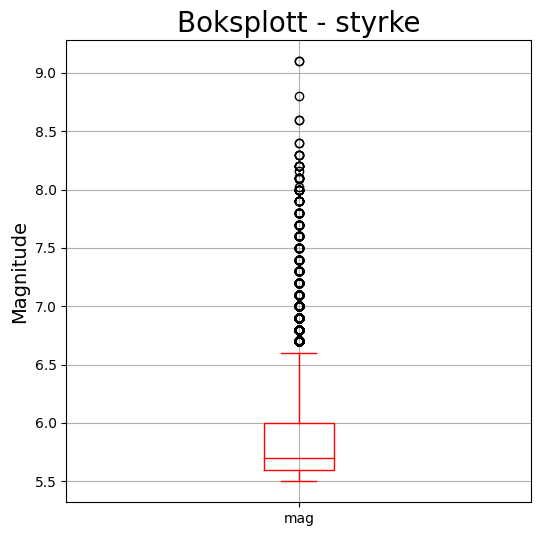

In [11]:
boksplott = skjelv.boxplot(
    column = "mag", 
    figsize = (6, 6), 
    color = "red"
)

plt.title("Boksplott - styrke", fontsize = 20)
plt.ylabel("Magnitude", fontsize = 14)
plt.show()

Boksplottet viser fordelinga av jordskjelva sin styrke. Ca 100 % av skjelva er mellom den øverste og nederste raude streken. 50 % av jordskjelva er inne i boksen. Og streken inni boksen er midten av jordskjelva (dvs 50 % av alle skjelva er svakare enn ca. 5,7)

Dei svarte punkta er "outliers".

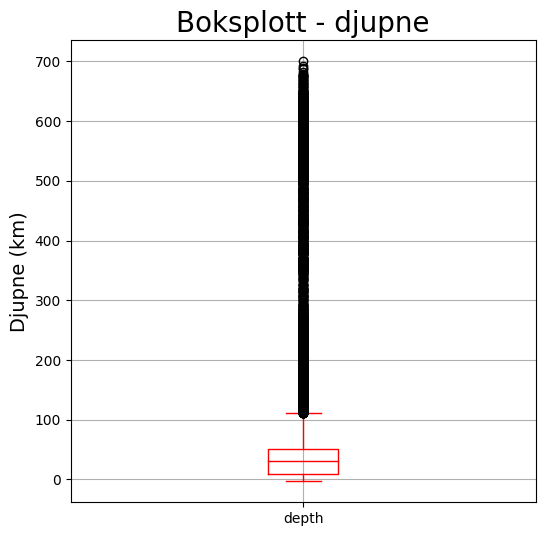

In [12]:
boksplott = skjelv.boxplot(
    column = "depth", 
    figsize = (6, 6), 
    color = "red"
)

plt.title("Boksplott - djupne", fontsize = 20)
plt.ylabel("Djupne (km)", fontsize = 14)
plt.show()

## Laga ei GeoDataFrame

Me bruker geopandas og lagar ei geodataframe. Dette er ein tabell tislvarande den me har sett på, men med ei ny kolonne - "geometry"

In [13]:
skjelv_gdf = gpd.GeoDataFrame(
    skjelv, 
    geometry = gpd.points_from_xy(
        skjelv.longitude, 
        skjelv.latitude
    )
)

skjelv_gdf.head()

,time,latitude,longitude,depth,mag,geometry
0,2023-09-15T18:07:39.104Z,-27.3252,-71.5543,4.854,5.7,POINT (-71.55430 -27.32520)
1,2023-09-14T22:51:26.057Z,-36.4662,-98.0487,10.000,5.6,POINT (-98.04870 -36.46620)
2,2023-09-14T19:58:44.373Z,-6.1974,149.5966,62.217,5.6,POINT (149.59660 -6.19740)
3,2023-09-13T11:49:15.926Z,-36.2201,-97.9378,10.000,6.1,POINT (-97.93780 -36.22010)
4,2023-09-12T11:03:18.873Z,19.2687,121.2178,41.281,6.3,POINT (121.21780 19.26870)


## Plotting!!!!

C:\Users\torott\AppData\Local\Temp\ipykernel_16864\745232744.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


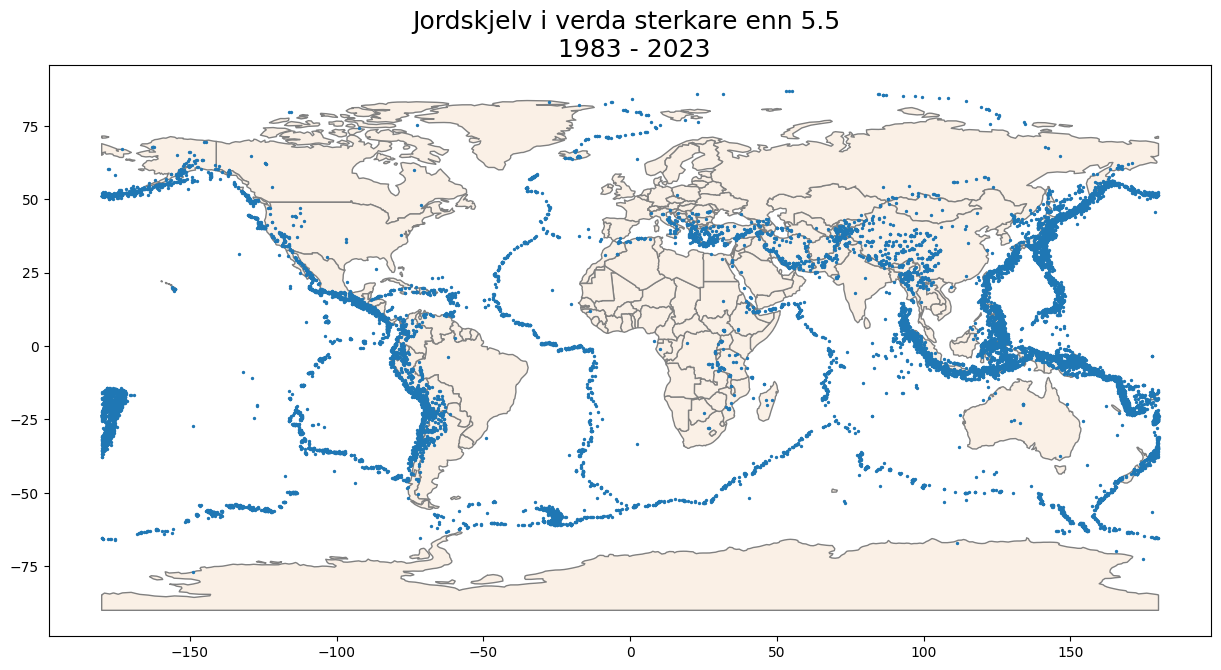

In [19]:
# bakgrunnskart
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# plotte bakgrunnskart
base = world.plot(
    color = "linen", 
    edgecolor = "gray",
    figsize = (15, 8)
)

# jordskjelva
skjelv_gdf.plot(ax = base, markersize = 2)

plt.title("Jordskjelv i verda sterkare enn 5.5 \n 1983 - 2023", fontsize = 18)
plt.show()